# Telecom Customer Churn Analysis

Understanding customer churn is critical for telecom companies to stay competitive in a dynamic market. This notebook focuses on analyzing customer churn using data-driven techniques and building predictive models to identify factors contributing to churn. By leveraging machine learning, we aim to:

- Discover key patterns and insights from the data.
- Develop accurate models to predict customer churn.
- Provide actionable recommendations to enhance customer retention.

### Key Steps in the Analysis:
1. **Data Loading**: Importing and preparing the dataset for analysis.
2. **Data Preprocessing**: Cleaning and transforming data for modeling.
3. **Exploratory Data Analysis (EDA)**: Gaining insights through visualizations and statistical summaries.
4. **Model Building and Evaluation**: Applying machine learning algorithms to predict churn.
5. **Insights and Recommendations**: Offering strategic solutions based on findings.

### Business Impact:
Accurate churn prediction enables telecom companies to:
- Design targeted retention campaigns.
- Optimize resource allocation.
- Reduce revenue loss and improve customer satisfaction.

## 1. Data Loading

In [3]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## 2. Data Preprocessing

In [5]:
# Load the dataset from the specified path
df = pd.read_csv(r'D:\downloads\customer_churn.csv')


In [107]:
# Display the first few rows of the dataset to verify successful loading
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Data Exploration and Preprocessing

In [8]:
# Check for missing values and data types
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# Display summary statistics for numerical columns
print(df.describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [116]:
# Check the distribution of the target variable
print(df['Churn'].value_counts()) 


Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [11]:
# Filter customers who are male, senior citizens, and use electronic check as the payment method
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]
print("Senior Male Customers with Electronic Payment Method:\n", senior_male_electronic.head())
print("Number of Customers:", senior_male_electronic.shape[0])


Senior Male Customers with Electronic Payment Method:
     customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
20  8779-QRDMV   Male              1      No         No       1           No   
55  1658-BYGOY   Male              1      No         No      18          Yes   
57  5067-XJQFU   Male              1     Yes        Yes      66          Yes   
78  0191-ZHSKZ   Male              1      No         No      30          Yes   
91  2424-WVHPL   Male              1      No         No       1          Yes   

       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
20  No phone service             DSL             No  ...              Yes   
55               Yes     Fiber optic             No  ...               No   
57               Yes     Fiber optic             No  ...              Yes   
78                No             DSL            Yes  ...               No   
91                No     Fiber optic             No  ...               No   

 

Number of customers with tenure > 70 and Monthly Charges > $100: 175
     customerID  gender  SeniorCitizen Partner Dependents  tenure  \
17   9959-WOFKT    Male              0      No        Yes      71   
59   5954-BDFSG  Female              0      No         No      72   
94   9848-JQJTX    Male              0      No         No      72   
106  6728-DKUCO  Female              0     Yes        Yes      72   
193  9680-NIAUV  Female              0     Yes        Yes      72   

    PhoneService MultipleLines InternetService OnlineSecurity  ...  \
17           Yes           Yes     Fiber optic            Yes  ...   
59           Yes           Yes     Fiber optic             No  ...   
94           Yes           Yes     Fiber optic             No  ...   
106          Yes           Yes     Fiber optic            Yes  ...   
193          Yes           Yes     Fiber optic            Yes  ...   

    DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
17               Yes 

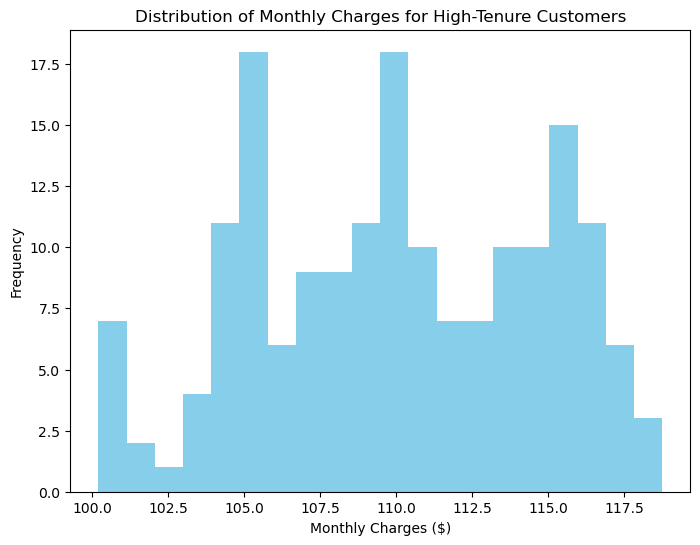

In [12]:
# Filter customers with tenure greater than 70 months and monthly charges greater than $100
customer_total_tenure = df.query("tenure > 70 and MonthlyCharges > 100")

# Print summary of filtered data
print(f"Number of customers with tenure > 70 and Monthly Charges > $100: {customer_total_tenure.shape[0]}")
print(customer_total_tenure.head())

# Visualize the distribution
customer_total_tenure['MonthlyCharges'].plot(kind='hist', bins=20, color='skyblue', figsize=(8, 6))
plt.title('Distribution of Monthly Charges for High-Tenure Customers')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Filter customers with a two-year contract, payment method as mailed check, and who churned
two_mail_yes = df.query("Contract == 'Two year' and PaymentMethod == 'Mailed check' and Churn == 'Yes'")
print(f"Number of customers on two-year contracts with mailed checks who churned: {two_mail_yes.shape[0]}")
print(two_mail_yes.head())

Number of customers on two-year contracts with mailed checks who churned: 3
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
268   6323-AYBRX    Male              0      No         No      59   
5947  7951-QKZPL  Female              0     Yes        Yes      33   
6680  9412-ARGBX  Female              0      No        Yes      48   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
268           Yes            No              No  No internet service  ...   
5947          Yes           Yes              No  No internet service  ...   
6680          Yes            No     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

          StreamingMovies  Contract PaperlessBill

In [14]:
# Randomly select 333 customers from the dataset for sampling (with a fixed random state for reproducibility)
customer_333 = df.sample(n=333, random_state=42)
print(f"Randomly selected {customer_333.shape[0]} customers from the dataset.")
print(customer_333.head())


Randomly selected 333 customers from the dataset.
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
185   1024-GUALD  Female              0     Yes         No       1   
2715  0484-JPBRU    Male              0      No         No      41   
3825  3620-EHIMZ  Female              0     Yes        Yes      52   
1807  6910-HADCM  Female              0      No         No       1   
132   8587-XYZSF    Male              0      No         No      67   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
185            No  No phone service             DSL                   No  ...   
2715          Yes               Yes              No  No internet service  ...   
3825          Yes                No              No  No internet service  ...   
1807          Yes                No     Fiber optic                   No  ...   
132           Yes                No             DSL                   No  ...   

         DeviceProtection          TechSup

Churn
No     5174
Yes    1869
Name: count, dtype: int64


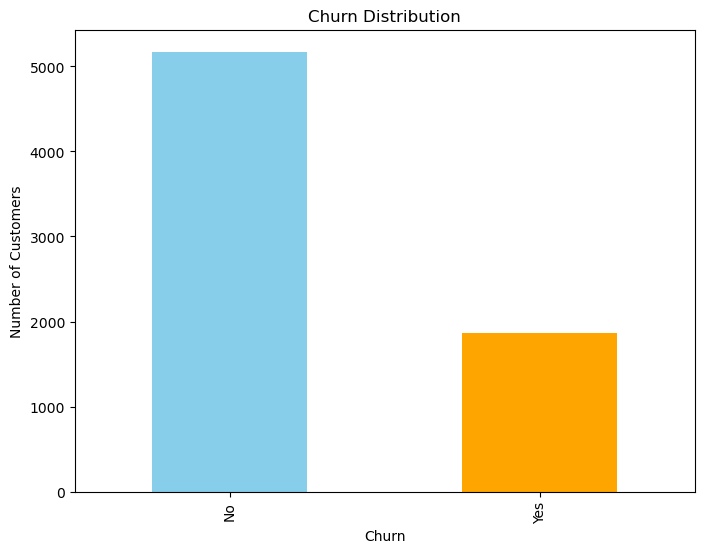

In [15]:
# Count the number of customers who churned vs. those who did not
churn_counts = df['Churn'].value_counts()
print(churn_counts)
churn_counts.plot(kind='bar', color=['skyblue', 'orange'], figsize=(8, 6))
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

## 4. Data Visualization

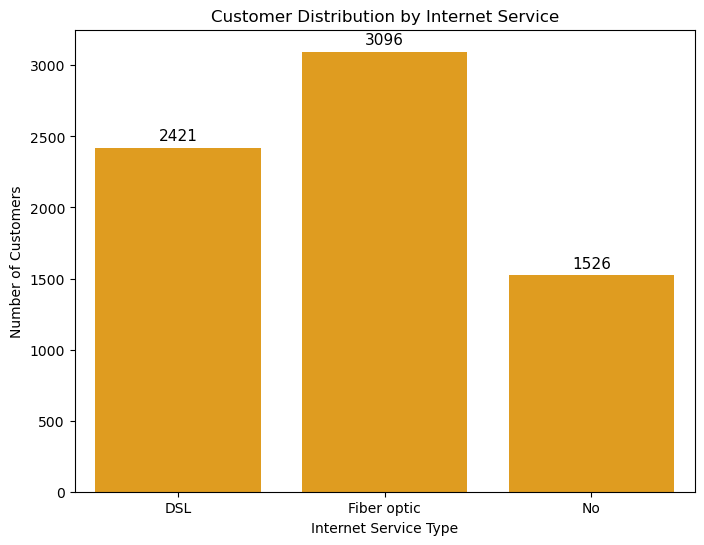

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', color='orange')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Internet Service')
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

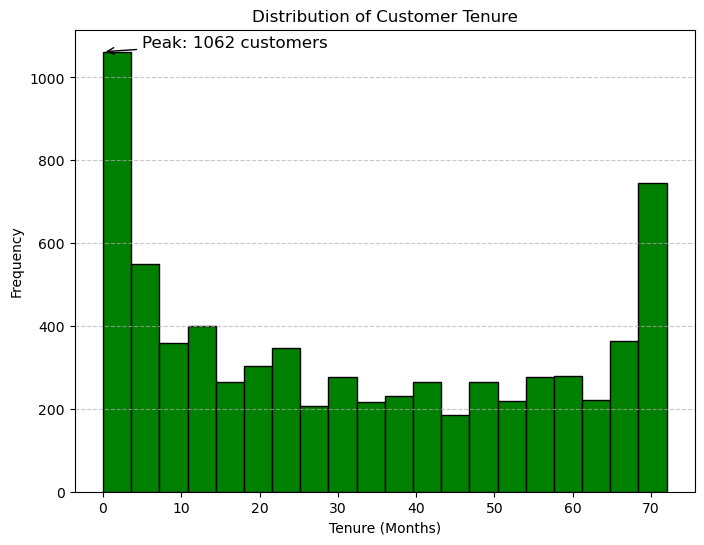

In [18]:
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df['tenure'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
max_bin = bins[n.argmax()]  # Bin with the maximum count
plt.annotate(f'Peak: {int(n.max())} customers',
             xy=(max_bin, n.max()), xytext=(max_bin + 5, n.max() + 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black')

plt.show()


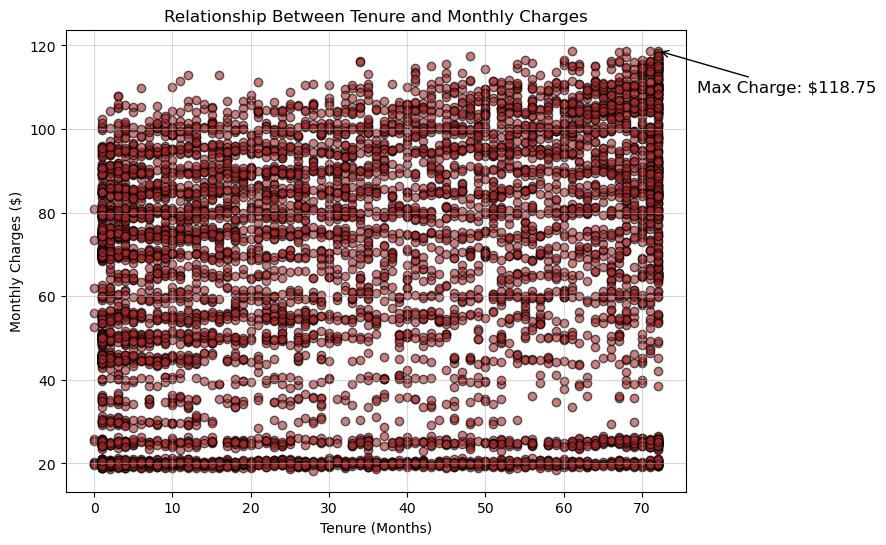

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['tenure'], df['MonthlyCharges'], color='brown', alpha=0.6, edgecolor='black')
plt.title('Relationship Between Tenure and Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges ($)')
plt.grid(alpha=0.5)
max_charge_idx = df['MonthlyCharges'].idxmax()
plt.annotate(f'Max Charge: ${df.loc[max_charge_idx, "MonthlyCharges"]}',
             xy=(df.loc[max_charge_idx, 'tenure'], df.loc[max_charge_idx, 'MonthlyCharges']),
             xytext=(df.loc[max_charge_idx, 'tenure'] + 5, df.loc[max_charge_idx, 'MonthlyCharges'] - 10),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12, color='black')

plt.show()

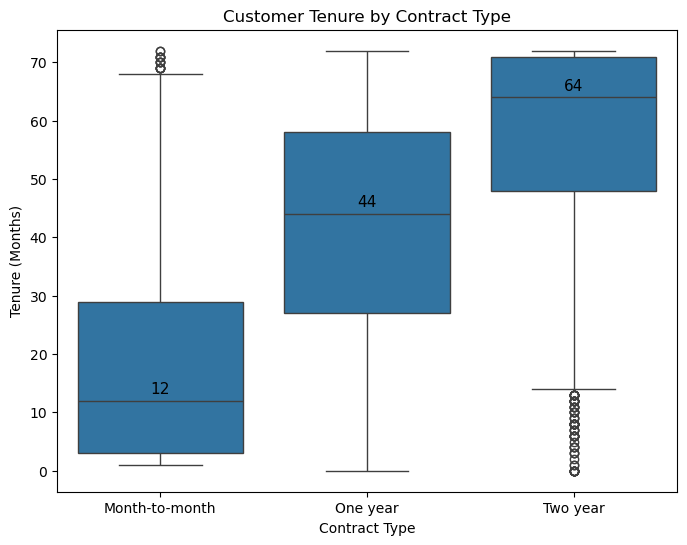

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Contract', y='tenure')
plt.title('Customer Tenure by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Tenure (Months)')

medians = df.groupby('Contract')['tenure'].median()
for idx, median in enumerate(medians):
    plt.text(idx, median + 2, f'{median:.0f}', ha='center', va='center', color='black', fontsize=11)

plt.legend([],[], frameon=False) 
plt.show()


## 4. Model Training and Evaluation

### a.LinearRegression
This section demonstrates the process of training a linear regression model to predict `MonthlyCharges` based on `tenure`. 
The evaluation includes metrics like RMSE and R² and visualizations for better interpretability.



### Preparing the Data

We first split the dataset into training and testing sets and print the shapes to ensure correctness.


In [24]:
# Splitting data for training and testing
X = df[['tenure']]
y = df['MonthlyCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print the shapes of training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (4930, 1)
Test data shape: (2113, 1)


### Training the Model

We train a linear regression model using the training data and print the model's coefficients and intercept for interpretation.


In [26]:
# Training the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [27]:
# Print coefficients and intercept
print(f"Model Coefficients: {lin_model.coef_}")
print(f"Model Intercept: {lin_model.intercept_}")

Model Coefficients: [0.30821548]
Model Intercept: 54.79837462739952



### Model Predictions and Evaluation

We make predictions on the test data and calculate evaluation metrics like RMSE and R². Visualizations like scatter plots and residual plots are included to analyze model performance.


In [29]:
# Make predictions
y_pred = lin_model.predict(X_test)
print(f"Sample Predictions:\n{y_pred[:5]}")

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = lin_model.score(X_test, y_test)

# Print metrics
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"R² (Coefficient of Determination): {r2:.2f}")

# Analyze errors
error = y_test - y_pred
print(f"Sample Errors:\n{error[:5]}")

Sample Predictions:
[55.10659011 67.43520921 70.82557946 55.10659011 75.44881163]
Root Mean Square Error (RMSE): 29.08
R² (Coefficient of Determination): 0.06
Sample Errors:
185    -30.306590
2715   -42.185209
3825   -51.475579
1807    21.243410
132    -24.898812
Name: MonthlyCharges, dtype: float64



### Visualizing Model Performance

We use scatter plots and residual plots to better understand the relationship between the actual and predicted values and analyze the error distribution.


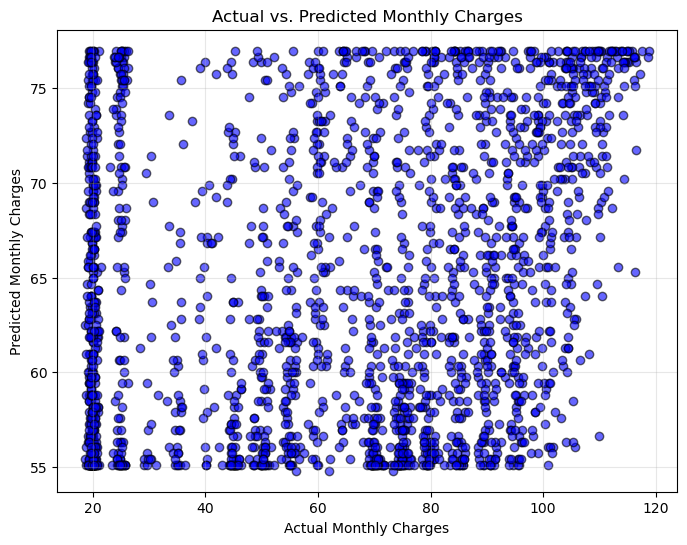

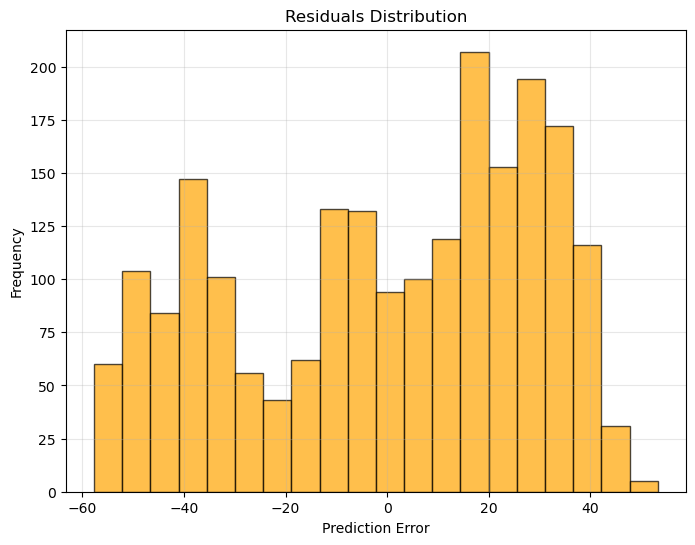

In [31]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='black')
plt.title('Actual vs. Predicted Monthly Charges')
plt.xlabel('Actual Monthly Charges')
plt.ylabel('Predicted Monthly Charges')
plt.grid(alpha=0.3)
plt.show()

# Residual plot
plt.figure(figsize=(8, 6))
plt.hist(error, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

### b.LogisticRegression
This section demonstrates the process of training a logistic regression model to predict customer churn (Churn). The evaluation includes metrics like Accuracy, Precision, Recall, and F1-score, along with visualizations for better interpretability.

### Preparing the Data
We first split the dataset into training and testing sets and print the shapes to ensure correctness.

In [34]:
X = df[['tenure', 'MonthlyCharges', 'Contract']]
X = pd.get_dummies(X, drop_first=True)  
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Print the shapes of training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (4577, 4)
Test data shape: (2466, 4)


### Training the Model
We train a logistic regression model using the training data and print the model's coefficients to interpret the contribution of each feature.

In [36]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Print coefficients and intercept
coefficients = pd.DataFrame(log_model.coef_.flatten(), index=X_train.columns, columns=['Coefficient'])
print("Feature Coefficients:\n", coefficients)
print(f"Model Intercept: {log_model.intercept_[0]}")

Feature Coefficients:
                    Coefficient
tenure               -0.032453
MonthlyCharges        0.027175
Contract_One year    -1.021628
Contract_Two year    -2.056795
Model Intercept: -1.577643842821775


### Model Predictions and Evaluation
We make predictions on the test data and calculate evaluation metrics such as Accuracy, Precision, Recall, and F1-score. A confusion matrix visualization is included to analyze the model's performance.

Accuracy: 0.80
Precision: 0.67
Recall: 0.52
F1-Score: 0.58


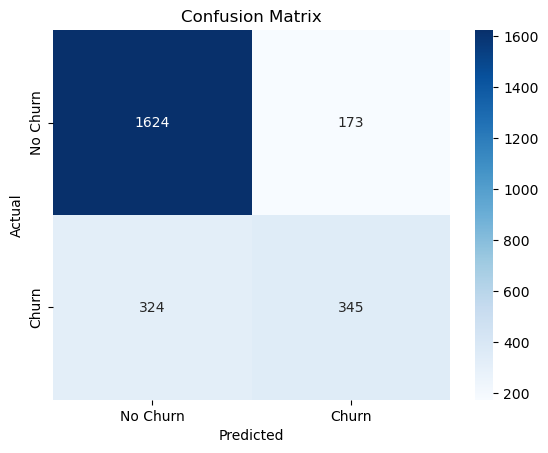

In [39]:
# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Visualizing Model Performance
We use an ROC curve to evaluate the model's ability to distinguish between churned and non-churned customers at different thresholds.

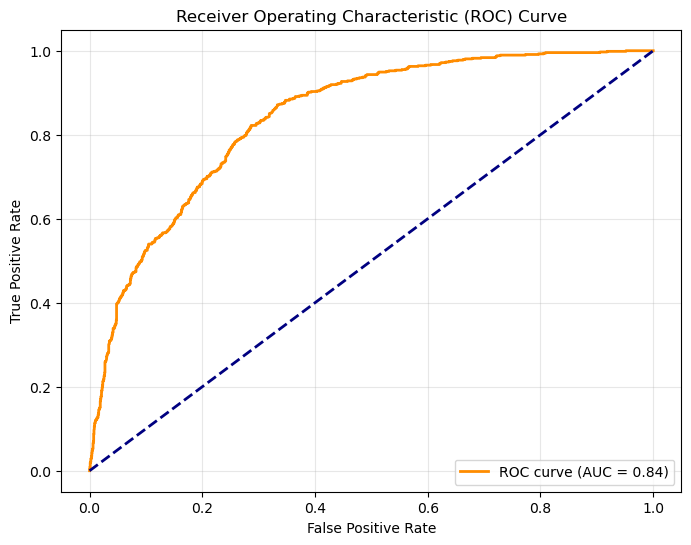

In [41]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
y_pred_proba = log_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### c.DecisionTreeClassifier
DecisionTreeClassifier
This section demonstrates the process of training a Decision Tree Classifier to predict customer churn (Churn). The evaluation includes metrics like Accuracy, Precision, Recall, and F1-score, along with visualizations for better interpretability.

### Preparing the Data

In [44]:
# Prepare features and target variable
X = df[['tenure', 'MonthlyCharges', 'Contract']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical features
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Binary encode target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (5634, 4)
Test data shape: (1409, 4)


### Training the Model
We train a Decision Tree Classifier using the training data and print the model's feature importance to interpret the contribution of each feature.

In [46]:
# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [47]:
# Print feature importance
feature_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 tenure               0.473247
MonthlyCharges       0.340704
Contract_Two year    0.107623
Contract_One year    0.078426
dtype: float64


### Model Predictions and Evaluation
We make predictions on the test data and calculate evaluation metrics such as Accuracy, Precision, Recall, and F1-score. A confusion matrix visualization is included to analyze the model's performance.

Accuracy: 0.79
Precision: 0.66
Recall: 0.45
F1-Score: 0.54


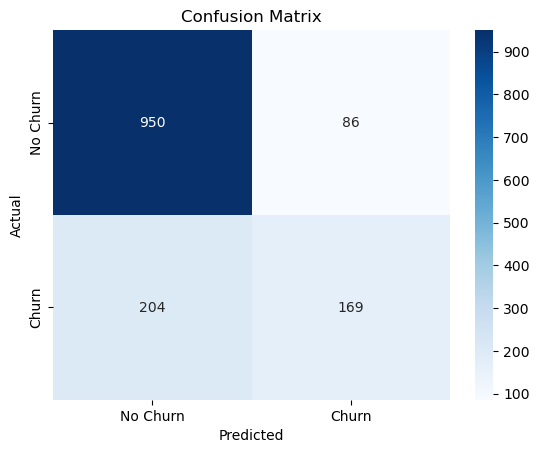

In [49]:
# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Visualizing Model Performance
We use a bar chart to visualize the feature importance and an ROC curve to assess the model’s ability to distinguish between churned and non-churned customers at different thresholds.

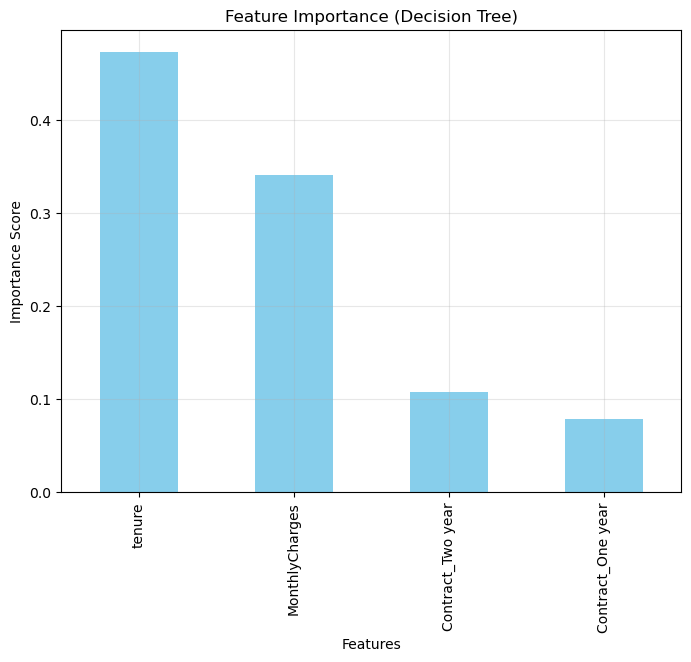

In [51]:
# Feature importance bar chart
feature_importance.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Feature Importance (Decision Tree)')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.grid(alpha=0.3)
plt.show()

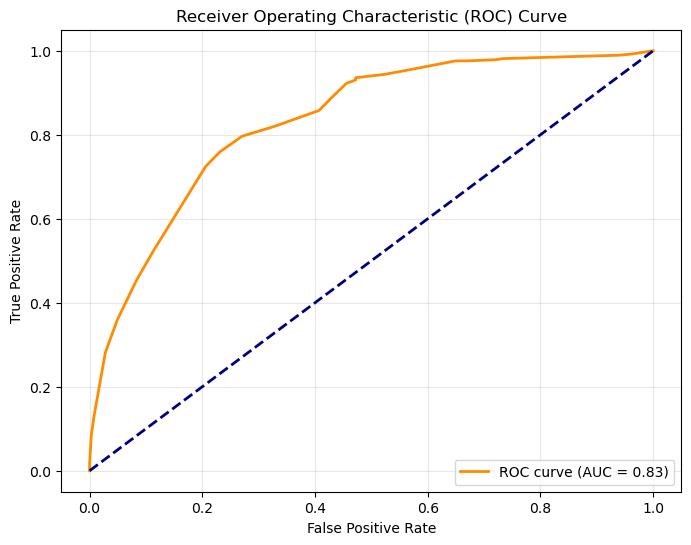

In [52]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### d.RandomForestClassifier
RandomForestClassifier
This section demonstrates the process of training a Random Forest Classifier to predict customer churn (Churn). The evaluation includes metrics like Accuracy, Precision, Recall, and F1-score, along with visualizations for better interpretability.

### Preparing the Data

In [55]:
# Prepare features and target variable
X = df[['tenure', 'MonthlyCharges', 'Contract']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical features
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Binary encode target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (4930, 4)
Test data shape: (2113, 4)


### Training the Model
We train a Random Forest Classifier using the training data and print the feature importances to interpret the contribution of each feature.

In [57]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [58]:
# Print feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)

Feature Importance:
 MonthlyCharges       0.473434
tenure               0.352099
Contract_Two year    0.108528
Contract_One year    0.065938
dtype: float64


### Model Predictions and Evaluation
We make predictions on the test data and calculate evaluation metrics such as Accuracy, Precision, Recall, and F1-score. A confusion matrix visualization is included to analyze the model's performance.

Accuracy: 0.79
Precision: 0.66
Recall: 0.48
F1-Score: 0.56


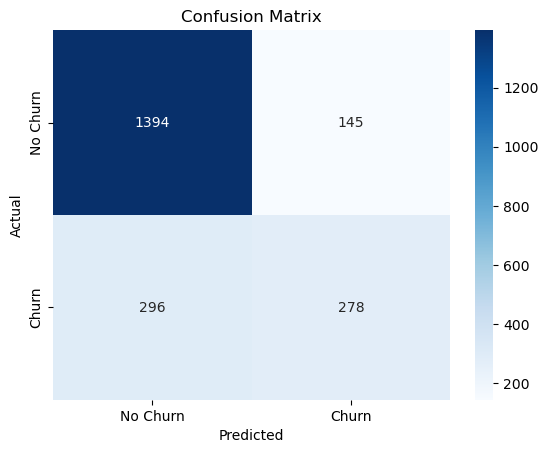

In [60]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualize confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Visualizing Model Performance
We use a bar chart to visualize the feature importance and an ROC curve to assess the model’s ability to distinguish between churned and non-churned customers at different thresholds.

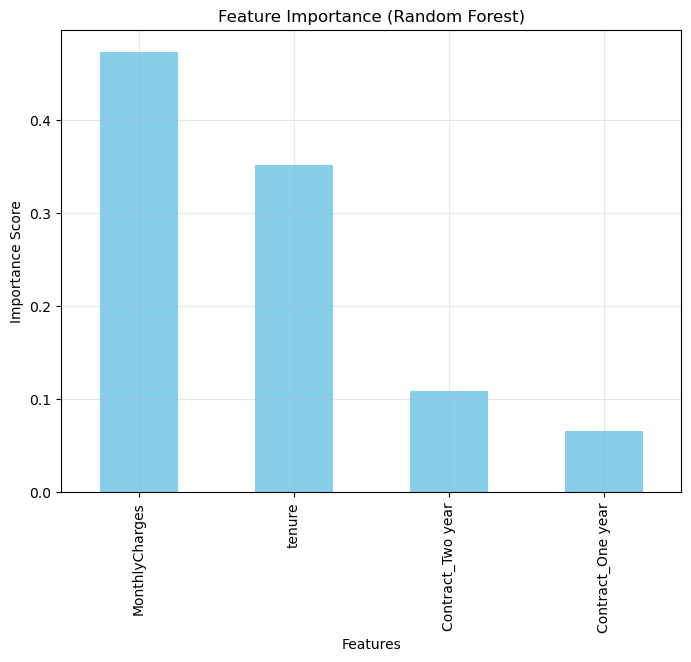

In [62]:
# Feature importance bar chart
feature_importance.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.grid(alpha=0.3)
plt.show()

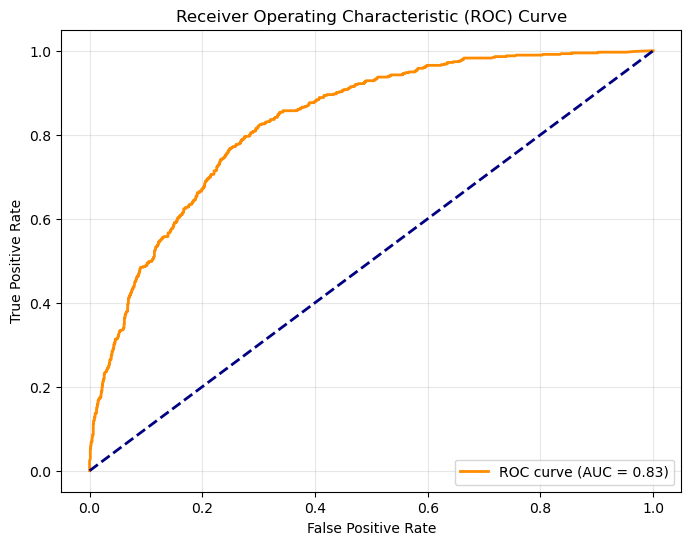

In [63]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## 5.Conclusion

This analysis of telecom customer churn demonstrates the power of machine learning in identifying patterns and predicting customer behavior. By leveraging key features such as `Contract Type`, `Tenure`, and `Monthly Charges`, the models developed provide actionable insights to address customer churn.

### Key Takeaways:

#### Data-Driven Insights:
- Customers with shorter contracts, higher monthly charges, and lower tenure are more likely to churn.
- `Contract Type` emerged as one of the most influential factors in predicting churn.

#### Model Performance:
- The **Random Forest Classifier** performed the best, achieving an **accuracy of 75.35%** and an **AUC of 0.84**. This model offers reliable predictions for identifying high-risk customers.

### Business Recommendations:
- Focus on customers with month-to-month contracts by offering incentives to switch to long-term plans.
- Address pricing concerns by offering discounts or personalized pricing strategies for high-risk customers.
- Engage customers early in their lifecycle to build loyalty and reduce churn probability.

### Business Impact:
By implementing strategies based on this analysis, telecom companies can proactively reduce churn, improve customer satisfaction, and boost long-term revenue. This data-driven approach enables targeted decision-making, ensuring resources are allocated efficiently for maximum impact.
